In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats

In [3]:
from google.colab import files

#Считываем файл
#uploaded = files.upload()

#Редактируем данные для удобства
data = pd.read_csv("Pistachio_Dataset.csv", sep=';')
data = data.replace(',', '.', regex=True)
data.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,63391,1568.405,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,0.3238,0.7278,0.0062,0.0037,0.5297,0.8734,Kirmizi_Pistachio
1,68358,1942.187,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,0.2277,0.7181,0.006,0.0034,0.5156,0.9024,Kirmizi_Pistachio
2,73589,1246.538,452.363,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.051,0.5951,0.6767,0.0061,0.003,0.4579,0.9391,Kirmizi_Pistachio
3,71106,1445.261,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,0.4278,0.7005,0.006,0.003,0.4907,0.9755,Kirmizi_Pistachio
4,80087,1251.524,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,0.6425,0.6803,0.0059,0.0028,0.4628,0.9833,Kirmizi_Pistachio




---


# Стандартизация данных
Для начала стандартизируем данные, чтобы корректно применить их в многомерном анализе.

Значения стандартизированной шкалы определяются следующим образом:

$ z_i = \frac{x_i-\bar{X}}{\sigma_x}$,

где $x_i$ — исходное значение признака, $\bar{X}$ и $\sigma_x$ — среднее значение и стандартное отклонение признака, оцененные по набору данных. В стандартизированных шкалах среднее значение величин $\bar{Z} = 0$ , стандартное отклонение $\sigma_x = 1$ .

In [4]:
#Стандартизируем данные
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data.drop('Class', axis=1))
scaled_features = scaler.transform(data.drop('Class', axis=1))
scaled_data = pd.DataFrame(scaled_features, columns = data.drop('Class', axis=1).columns)



---

# Разделение train-test

Далее разделим нашу выборку на train и test. Для test'а выделим 30% нашей выборки.

In [5]:
from sklearn.model_selection import train_test_split

x = scaled_data
y = data['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)



---
# Метод K ближайших соседей


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Создадим массив значений точности метода KNN
Accuracy_knn=[]

for k in range(1, 501):

  model_knn = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)
  #prediction_knn = model_knn.predict(x_test)
  Accuracy_knn.append(model_knn.score(x_test, y_test))

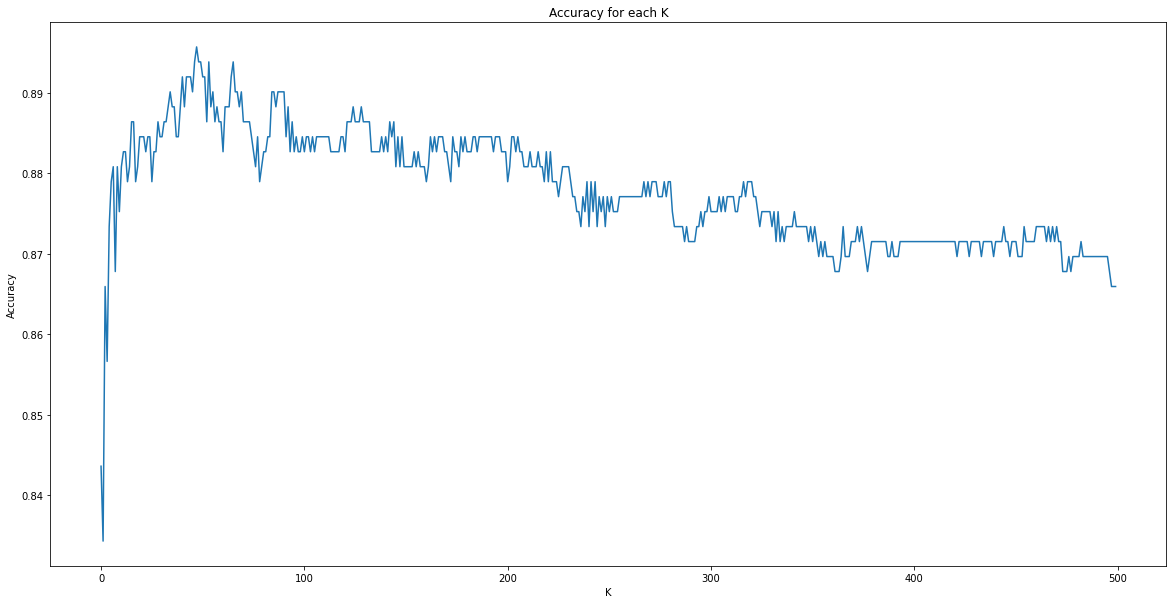

In [ ]:
#Нарисуем график значений точности для каждого K
plt.figure(figsize=(20,10))
plt.ylabel('Accuracy')
plt.xlabel('K')
plt.title('Accuracy for each K')
plt.plot(Accuracy_knn)

In [ ]:
#Определим K для наилучшей точности и ее значение
k_max = np.argmax(Accuracy_knn)+1
print("Наилучшая точность метода = %.2f\nДостигается при k = %d"%(Accuracy_knn[k_max-1], k_max))

Наилучшая точность метода = 0.90
Достигается при k = 48


Для данных выборок train / test получили, что при $k = 9$ точность метода максимальна и $\thickapprox 0.88$


---

# Логистическая регрессия

Логистическая регрессия применяется для прогнозирования вероятности возникновения некоторого события по значениям множества признаков.

$P\{y=1|x\} = f(z)$, где 

$f(z) = \frac{1}{1+e^{-z}}$, а $z=\theta_0+\theta_1 x_1+...+\theta_k x_k$.

Суть метода подобрать вектор $\theta$. Обычно он подбирается с помощью функции максимума правдоподобия
$\widehat{\theta}=argmax_{\theta}L(\theta)$
При классифиации на 2 группы обхект $x$ относится к группе $y=1$, если $P\{y=1|x\}>0.5$, и к группе $y=1$ в ином случае.

In [ ]:
#Регрессия
from sklearn.linear_model import LogisticRegression

model_reg = LogisticRegression().fit(x_train, y_train)
print("Точность метода = %.2f"%model_reg.score(x_test, y_test))

Точность метода = 0.87


Для данных выборок train / test получили, что точность метода *линейной регрессии* составляет $\thickapprox0.87$, что меньше, чем у метода *9 ближайших соседей*



---

# Вывод
При правильно выбранном $k=9$ метод KNN оказался более точным, чем метод линейной регрессии: $0.88 > 0.87$

Однако точность и результат сильно зависит от выбранного k и соотношения train / test.